In [1]:
from MSSD import MSSD
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
def sphere_point(theta, phi):
    return [math.sin(phi)*math.cos(theta), math.sin(phi)*math.sin(theta), -math.cos(phi)]

def great_circle_with_time(theta, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

traj1 = great_circle_with_time(2*math.pi*0.1, length=20, time_i=0, time_f=8)
traj2 = great_circle_with_time(2*math.pi*0.6, length=20, time_i=5, time_f=13)

In [6]:
dist_mat = np.zeros((len(traj1), len(traj2)))
eps = 1.976
for i in range(len(traj1)):
    for j in range(len(traj2)):
        dist_mat[i,j] = round(np.linalg.norm(traj1[i][1:]-traj2[j][1:]), 3)

print(dist_mat)
print((dist_mat < eps)*np.ones((len(traj1), len(traj2))))
#plt.matshow((dist_mat < eps))

[[0.765 0.908 1.045 1.176 1.299 1.414 1.521 1.618]
 [0.908 1.045 1.176 1.299 1.414 1.521 1.618 1.705]
 [1.045 1.176 1.299 1.414 1.521 1.618 1.705 1.782]
 [1.176 1.299 1.414 1.521 1.618 1.705 1.782 1.848]
 [1.299 1.414 1.521 1.618 1.705 1.782 1.848 1.902]
 [1.414 1.521 1.618 1.705 1.782 1.848 1.902 1.945]
 [1.521 1.618 1.705 1.782 1.848 1.902 1.945 1.975]
 [1.618 1.705 1.782 1.848 1.902 1.945 1.975 1.994]]
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0.]]


In [4]:
mssd = MSSD()
mssd.set_trajectories(traj1, traj2)

mssd.compute_filt()
mssd.t_thresh_metric(7)

1.975

[0.313 0.908 1.414 1.782 1.975 1.975 1.975 1.975]


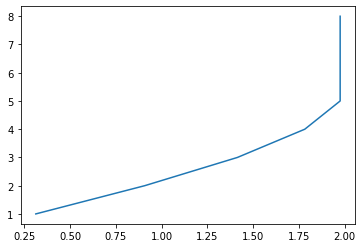

In [5]:
print(mssd.filt)

x = [i+1 for i in range(mssd.filt.shape[0])]
y = [mssd.filt[i] for i in range(mssd.filt.shape[0])]

plt.plot(y,x)
plt.show()